In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
df=pd.read_csv(r'C:\Users\anike\Downloads\pima_indians_diabetes.csv')

In [4]:
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,test
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.shape

(768, 9)

In [49]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   insu    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   test    768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
df.isnull().sum()

preg    0
plas    0
pres    0
skin    0
insu    0
mass    0
pedi    0
age     0
test    0
dtype: int64

In [27]:

X = df.drop('test',axis=1)
y = df.test

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [29]:
X_train.shape, X_test.shape

((614, 8), (154, 8))

In [30]:
X_train.dtypes

preg      int64
plas      int64
pres      int64
skin      int64
insu      int64
mass    float64
pedi    float64
age       int64
dtype: object

In [31]:
X_train.isnull().sum()

preg    0
plas    0
pres    0
skin    0
insu    0
mass    0
pedi    0
age     0
dtype: int64

In [32]:
X_test.isnull().sum()

preg    0
plas    0
pres    0
skin    0
insu    0
mass    0
pedi    0
age     0
dtype: int64

In [33]:
X_train.head()

,preg,plas,pres,skin,insu,mass,pedi,age
603,7,150,78,29,126,35.2,0.692,54
118,4,97,60,23,0,28.2,0.443,22
247,0,165,90,33,680,52.3,0.427,23
157,1,109,56,21,135,25.2,0.833,23
468,8,120,0,0,0,30.0,0.183,38


In [34]:
X_test.head()

,preg,plas,pres,skin,insu,mass,pedi,age
661,1,199,76,43,0,42.9,1.394,22
122,2,107,74,30,100,33.6,0.404,23
113,4,76,62,0,0,34.0,0.391,25
14,5,166,72,19,175,25.8,0.587,51
529,0,111,65,0,0,24.6,0.660,31


In [35]:
cols = X_train.columns

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [37]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [38]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [39]:
X_train.head()

,preg,plas,pres,skin,insu,mass,pedi,age
0,0.908329,0.915694,0.449124,0.522226,0.373635,0.378526,0.677404,1.699558
1,0.036447,-0.751822,-0.472301,0.148149,-0.699657,-0.506672,-0.070497,-0.965692
2,-1.126063,1.387632,1.063407,0.771611,5.092711,2.540941,-0.118555,-0.882403
3,-0.835435,-0.374271,-0.677062,0.023456,0.450299,-0.886043,1.100914,-0.882403
4,1.198956,-0.028183,-3.543717,-1.285816,-0.699657,-0.279050,-0.851438,0.366933


In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [51]:
y_pred = knn.predict(X_test)

y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [52]:
knn.predict_proba(X_test)[:,0]

array([0.        , 1.        , 0.66666667, 0.33333333, 1.        ,
       1.        , 0.33333333, 0.        , 0.33333333, 1.        ,
       0.33333333, 0.66666667, 1.        , 1.        , 1.        ,
       1.        , 0.33333333, 1.        , 0.66666667, 1.        ,
       0.66666667, 1.        , 1.        , 0.66666667, 1.        ,
       0.33333333, 1.        , 0.        , 1.        , 0.66666667,
       0.33333333, 1.        , 1.        , 0.        , 1.        ,
       0.66666667, 0.66666667, 1.        , 1.        , 0.        ,
       0.66666667, 1.        , 0.33333333, 0.33333333, 0.33333333,
       1.        , 1.        , 1.        , 0.66666667, 1.        ,
       0.66666667, 1.        , 0.        , 0.33333333, 1.        ,
       1.        , 1.        , 0.        , 1.        , 1.        ,
       0.        , 0.33333333, 1.        , 0.33333333, 0.33333333,
       0.        , 0.33333333, 1.        , 0.33333333, 0.66666667,
       1.        , 0.33333333, 1.        , 0.33333333, 0.     

In [53]:
knn.predict_proba(X_test)[:,1]

array([1.        , 0.        , 0.33333333, 0.66666667, 0.        ,
       0.        , 0.66666667, 1.        , 0.66666667, 0.        ,
       0.66666667, 0.33333333, 0.        , 0.        , 0.        ,
       0.        , 0.66666667, 0.        , 0.33333333, 0.        ,
       0.33333333, 0.        , 0.        , 0.33333333, 0.        ,
       0.66666667, 0.        , 1.        , 0.        , 0.33333333,
       0.66666667, 0.        , 0.        , 1.        , 0.        ,
       0.33333333, 0.33333333, 0.        , 0.        , 1.        ,
       0.33333333, 0.        , 0.66666667, 0.66666667, 0.66666667,
       0.        , 0.        , 0.        , 0.33333333, 0.        ,
       0.33333333, 0.        , 1.        , 0.66666667, 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       1.        , 0.66666667, 0.        , 0.66666667, 0.66666667,
       1.        , 0.66666667, 0.        , 0.66666667, 0.33333333,
       0.        , 0.66666667, 0.        , 0.66666667, 1.     

In [54]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.7403


In [55]:
y_pred_train = knn.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8485


In [56]:
print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

Training set score: 0.8485
Test set score: 0.7403


In [57]:
y_test.value_counts()

0    107
1     47
Name: test, dtype: int64

In [58]:
null_accuracy = (107/(107+47))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.6948


In [59]:
knn_5 = KNeighborsClassifier(n_neighbors=5)


# fit the model to the training set
knn_5.fit(X_train, y_train)


# predict on the test-set
y_pred_5 = knn_5.predict(X_test)


print('Model accuracy score with k=5 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_5)))

Model accuracy score with k=5 : 0.7987


In [60]:
knn_6 = KNeighborsClassifier(n_neighbors=6)


# fit the model to the training set
knn_6.fit(X_train, y_train)


# predict on the test-set
y_pred_6 = knn_6.predict(X_test)


print('Model accuracy score with k=6 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_6)))

Model accuracy score with k=6 : 0.8052


In [61]:
knn_7 = KNeighborsClassifier(n_neighbors=7)


# fit the model to the training set
knn_7.fit(X_train, y_train)


# predict on the test-set
y_pred_7 = knn_7.predict(X_test)


print('Model accuracy score with k=7 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_7)))

Model accuracy score with k=7 : 0.7727


In [62]:
knn_8 = KNeighborsClassifier(n_neighbors=8)


# fit the model to the training set
knn_8.fit(X_train, y_train)


# predict on the test-set
y_pred_8 = knn_8.predict(X_test)


print('Model accuracy score with k=8 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_8)))

Model accuracy score with k=8 : 0.7792


In [63]:
knn_9 = KNeighborsClassifier(n_neighbors=9)


# fit the model to the training set
knn_9.fit(X_train, y_train)


# predict on the test-set
y_pred_9 = knn_9.predict(X_test)


print('Model accuracy score with k=9 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_9)))

Model accuracy score with k=9 : 0.7727


In [75]:
from sklearn.metrics import confusion_matrix

cm_6 = confusion_matrix(y_test, y_pred_6)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[99  8]
 [22 25]]

True Positives(TP) =  99

True Negatives(TN) =  25

False Positives(FP) =  8

False Negatives(FN) =  22


In [71]:
cm_7 = confusion_matrix(y_test, y_pred_7)

print('Confusion matrix\n\n', cm_7)

print('\nTrue Positives(TP) = ', cm_7[0,0])

print('\nTrue Negatives(TN) = ', cm_7[1,1])

print('\nFalse Positives(FP) = ', cm_7[0,1])

print('\nFalse Negatives(FN) = ', cm_7[1,0])

Confusion matrix

 [[91 16]
 [19 28]]

True Positives(TP) =  91

True Negatives(TN) =  28

False Positives(FP) =  16

False Negatives(FN) =  19


<AxesSubplot:>

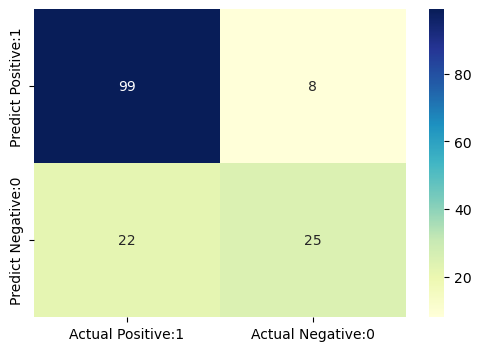

In [76]:
plt.figure(figsize=(6,4))

cm_matrix = pd.DataFrame(data=cm_6, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')


In [77]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_6))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       107
           1       0.76      0.53      0.62        47

    accuracy                           0.81       154
   macro avg       0.79      0.73      0.75       154
weighted avg       0.80      0.81      0.79       154



In [78]:
TP = cm_6[0,0]
TN = cm_6[1,1]
FP = cm_6[0,1]
FN = cm_6[1,0]

In [79]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8052


In [80]:
precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9252


In [81]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.8182


In [82]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.8182


In [83]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))


False Positive Rate : 0.2424


In [84]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.7576


In [87]:
y_pred_prob = knn.predict_proba(X_test)[0:10]

y_pred_prob

array([[0.        , 1.        ],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [0.33333333, 0.66666667],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.33333333, 0.66666667],
       [0.        , 1.        ],
       [0.33333333, 0.66666667],
       [1.        , 0.        ]])

In [89]:
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of -not having diabetes (0)', 'Prob of - having diabetes (1)'])

y_pred_prob_df

,Prob of -not having diabetes (0),Prob of - having diabetes (1)
0,0.000000,1.000000
1,1.000000,0.000000
2,0.666667,0.333333
3,0.333333,0.666667
4,1.000000,0.000000
5,1.000000,0.000000
6,0.333333,0.666667
7,0.000000,1.000000
8,0.333333,0.666667
9,1.000000,0.000000
